<a href="https://colab.research.google.com/github/dincbariscagri/cng562/blob/master/Din%C3%A7_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forest Fires Analysis

## Importing Libraries and Dataset

In [0]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import os
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [0]:
url = 'https://raw.githubusercontent.com/dincbariscagri/cng562/master/uci-forestfires%20-%20forestfires.csv'
dataset = pd.read_csv(url)

## Heatmap and Histograms for Numeric Paramaters

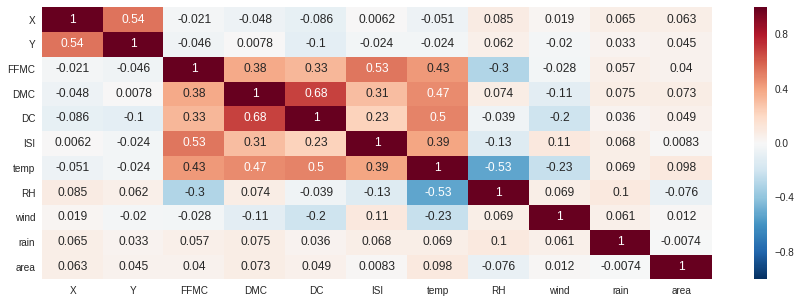

In [34]:
plt.figure(figsize=(15,5))
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52ed33320>,
      dtype=object)

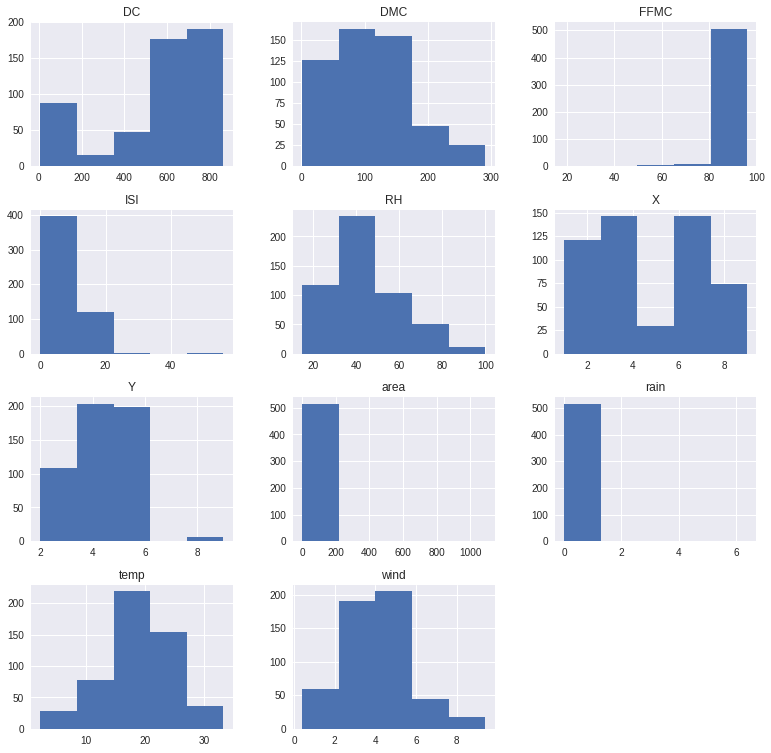

In [35]:
dataset.hist(bins=5, figsize=(13,13))

## Dataset Manipulations

### Applying Scaler and Transformations to Solve Skewness Problems

In [36]:
scaler = MinMaxScaler()

dataset["DMC_norm"] = scaler.fit_transform(dataset[["DMC"]])
dataset["DMC_log"] = np.log(dataset["DMC_norm"]+1)

dataset["RH_norm"] = scaler.fit_transform(dataset[["RH"]])
dataset["RH_sqrt"] = np.sqrt(dataset["RH_norm"])

dataset["ISI_norm"] = scaler.fit_transform(dataset[["ISI"]])
dataset["ISI_sqrt"] = np.sqrt(dataset["ISI_norm"])

dataset["DC_norm"] = scaler.fit_transform(dataset[["DC"]])
dataset["DC_sqr"] = np.power(dataset["DC_norm"],2)

dataset["FFMC_norm"] = scaler.fit_transform(dataset[["FFMC"]])
dataset["FFMC_log"] = np.log(dataset["FFMC_norm"]+1)

dataset["area_norm"] = scaler.fit_transform(dataset[["area"]])
dataset["area_cube_rt"] = np.power(dataset["area_norm"],1/3)

dataset["rain_norm"] = scaler.fit_transform(dataset[["rain"]])
dataset["rain_cube_rt"] = np.power(dataset["rain_norm"],1/3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Transformed Versions of Histograms with Heatmap

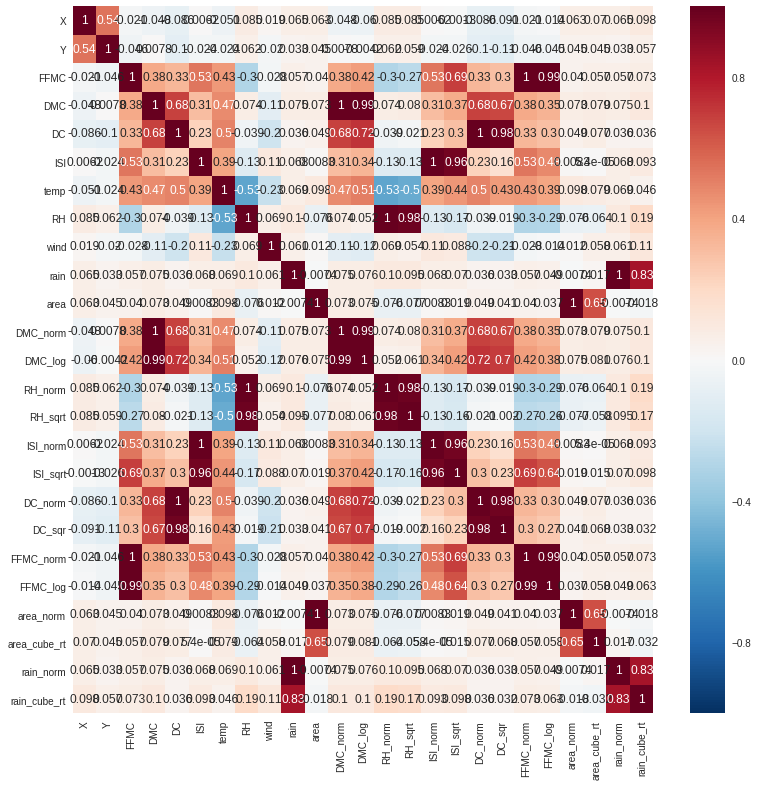

In [37]:
plt.figure(figsize=(13,13))
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52cd1b6d8>,
      dtype=object)

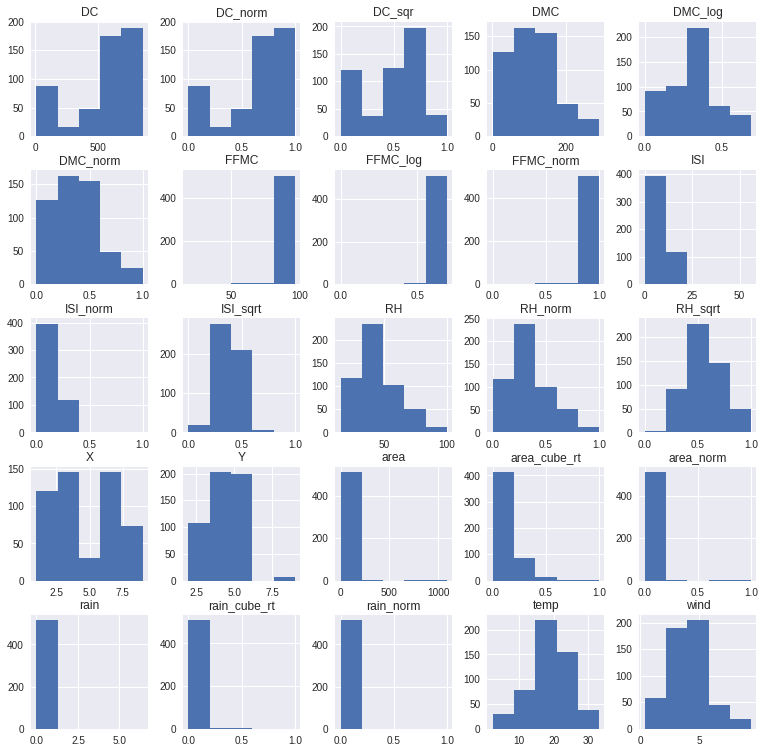

In [38]:
dataset.hist(bins=5, figsize=(13,13))

### Splitting Dataset without Outlier Fixations

In [0]:
X= pd.get_dummies(dataset.drop({"area_cube_rt","DMC_norm","RH_norm","ISI_norm","DC_norm","FFMC_norm","area_norm","rain_norm","DMC","RH","ISI","DC","FFMC","area","rain"},axis=1),drop_first=True).iloc[:,:].values
Y= dataset['area_cube_rt'].iloc[:].values

### Train and Test Set Separations

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Regression Models

## Multiple Linear Regression

In [0]:
regressorMultipleLinear = LinearRegression()
regressorMultipleLinear.fit(X_train,Y_train)
Y_predictMultipleLinear = regressorMultipleLinear.predict(X_test)

### Statistical Scores

In [42]:
print("Explained Variance Score: ",metrics.explained_variance_score(Y_test, Y_predictMultipleLinear))
print("Mean Absolute Error Score: ",metrics.mean_absolute_error(Y_test, Y_predictMultipleLinear))
print("Mean Squared Error Score: ",metrics.mean_squared_error(Y_test, Y_predictMultipleLinear))
print("Median Absolute Error Score: ",metrics.median_absolute_error(Y_test, Y_predictMultipleLinear))
print("R-Squared Score: ",metrics.r2_score(Y_test, Y_predictMultipleLinear))

Explained Variance Score:  -0.09315342057765297
Mean Absolute Error Score:  0.11970975981423661
Mean Squared Error Score:  0.02179541141149418
Median Absolute Error Score:  0.09922128707759459
R-Squared Score:  -0.10177536606864201


## Applying Outlier Fixations Based On Z-Scores and Threshold of 3

In [43]:
z = np.abs(stats.zscore(X))
print(z)

[[1.00831277 0.56986043 1.84264015 ... 0.36574845 0.37587279 0.34151233]
 [1.00831277 0.24400101 0.15327826 ... 0.36574845 2.66047458 0.34151233]
 [1.00831277 0.24400101 0.73938341 ... 0.36574845 0.37587279 0.34151233]
 ...
 [1.00831277 0.24400101 0.3983501  ... 0.36574845 0.37587279 0.34151233]
 [1.58736044 0.24400101 1.15683911 ... 0.36574845 0.37587279 0.34151233]
 [0.57570057 1.05786246 1.22205823 ... 0.36574845 2.66047458 0.34151233]]


### Values Having Higher Z-Score Than Threshold

In [44]:
print(np.where(z>3))

(array([  1,   2,   3,  12,  17,  22,  22,  36,  37,  38,  40,  47,  57,
        58,  59,  75,  75,  76,  76,  85,  96,  97, 104, 125, 128, 129,
       130, 130, 138, 138, 143, 150, 151, 151, 152, 168, 181, 182, 183,
       197, 199, 202, 203, 210, 223, 226, 243, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 286, 287, 288, 289,
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 299, 299, 300,
       301, 302, 303, 304, 312, 312, 371, 379, 379, 379, 380, 390, 394,
       395, 399, 400, 402, 407, 409, 410, 411, 411, 412, 416, 420, 422,
       435, 443, 455, 463, 464, 465, 469, 471, 472, 473, 474, 475, 475,
       476, 477, 478, 479, 480, 480, 481, 499, 500, 501, 502, 509, 516]), array([19, 19,  9,  8, 19,  6, 15, 19, 19, 19, 14, 14, 19, 12, 12,  1, 12,
        1, 12,  5, 12,  8, 13, 19, 19, 19,  8, 12,  1, 14, 14, 15,  1, 14,
       14,  3, 19, 12, 19,  5,  8, 12, 19, 19, 14, 19,  9, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 14,  9, 14, 1

###Cleaning The Outliers and New Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52c5dde48>,
      dtype=object)

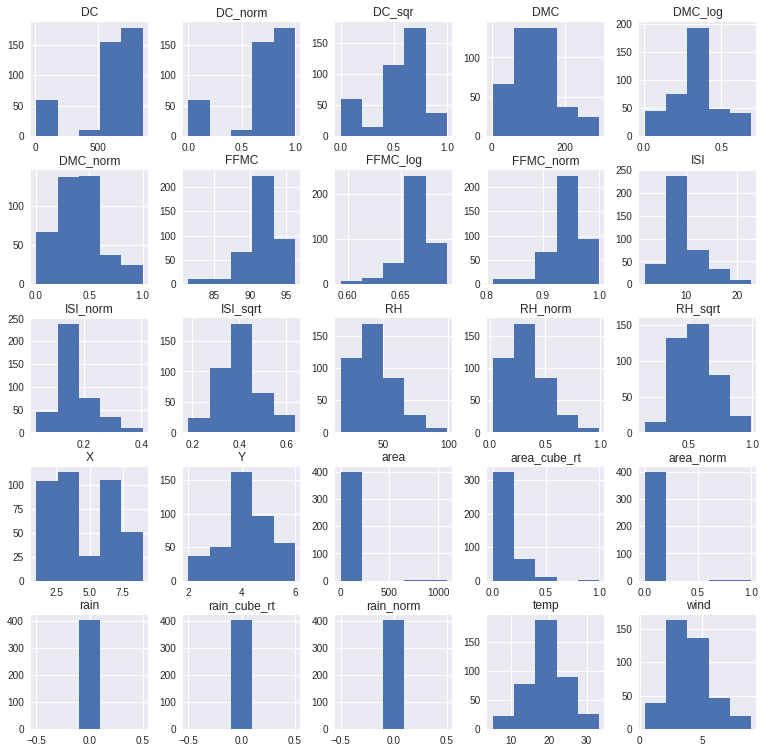

In [45]:
#Removal
dataset_o = dataset[(z < 3).all(axis=1)] 

dataset_o.hist(bins=5, figsize=(13,13))

## Separation of Train and Test Sets

In [0]:
X= pd.get_dummies(dataset_o.drop({"area_cube_rt","DMC_norm","RH_norm","ISI_norm","DC_norm","FFMC_norm","area_norm","rain_norm","DMC","RH","ISI","DC","FFMC","area","rain"},axis=1),drop_first=True).iloc[:,:].values
Y= dataset_o['area_cube_rt'].iloc[:].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

## Reapplication of Multiple Linear Regression

In [0]:
regressorMultipleLinear = LinearRegression()
regressorMultipleLinear.fit(X_train,Y_train)
Y_predictMultipleLinear = regressorMultipleLinear.predict(X_test)

### Statistical Scores

In [48]:
print("Explained Variance Score: ",metrics.explained_variance_score(Y_test, Y_predictMultipleLinear))
print("Mean Absolute Error Score: ",metrics.mean_absolute_error(Y_test, Y_predictMultipleLinear))
print("Mean Squared Error Score: ",metrics.mean_squared_error(Y_test, Y_predictMultipleLinear))
print("Median Absolute Error Score: ",metrics.median_absolute_error(Y_test, Y_predictMultipleLinear))
print("R-Squared Score: ",metrics.r2_score(Y_test, Y_predictMultipleLinear))

Explained Variance Score:  0.012885040275047333
Mean Absolute Error Score:  0.11204372736530767
Mean Squared Error Score:  0.023457728997868778
Median Absolute Error Score:  0.09574268407360481
R-Squared Score:  0.012745568485283854


#Classification Models

## Support Vector Machine

In [49]:
Y_train=Y_train>0
Y_test=Y_test>0

classifierSVM = SVC(kernel="rbf", gamma="auto")
classifierSVM.fit(X_train,Y_train)
Y_predictSVM = classifierSVM.predict(X_test)

cmSVM =confusion_matrix(Y_test,Y_predictSVM)
accuracy_score(Y_test,Y_predictSVM)

0.5802469135802469

## Logistic Regression

In [53]:
classifierLogistic = LogisticRegression(solver="newton-cg")
classifierLogistic.fit(X_train,Y_train)
Y_predictLogistic = classifierLogistic.predict(X_test)

cmLogistic =confusion_matrix(Y_test,Y_predictLogistic)
accuracy_score(Y_test,Y_predictLogistic)

0.4444444444444444

## Decision Tree Classifier

In [54]:
classifierDecisionTree = DecisionTreeClassifier()
classifierDecisionTree.fit(X_train,Y_train)
Y_predictDecisionTreeClassifier = classifierDecisionTree.predict(X_test)

cmDecisionTreeClassifier = confusion_matrix(Y_test,Y_predictDecisionTreeClassifier)
accuracy_score(Y_test,Y_predictDecisionTreeClassifier)

0.43209876543209874

## K-N Classifier

In [55]:
classifierKNN = KNeighborsClassifier(n_neighbors=17, metric="minkowski", p=2)
classifierKNN.fit(X_train,Y_train)
Y_predictKNN = classifierKNN.predict(X_test)

cmKNN =confusion_matrix(Y_test,Y_predictKNN)
accuracy_score(Y_test,Y_predictKNN)

0.5308641975308642

# K-Fold Cross Validation Scores

In [56]:
accuraciesLogistic = cross_val_score(estimator= classifierLogistic,X=X_train,y=Y_train,cv=10)
print("Logistic Regression Accuracy Mean:", accuraciesLogistic.mean())

accuraciesKNN = cross_val_score(estimator= classifierKNN,X=X_train,y=Y_train,cv=10)
print("KNN Accuracy Mean:", accuraciesKNN.mean())

accuraciesSVM = cross_val_score(estimator= classifierSVM,X=X_train,y=Y_train,cv=10)
print("SVM Accuracy Mean:", accuraciesSVM.mean())

accuraciesDecisionTree = cross_val_score(estimator= classifierDecisionTree,X=X_train,y=Y_train,cv=10)
print("Decision Tree Classifier Accuracy Mean:", accuraciesDecisionTree.mean())


Logistic Regression Accuracy Mean: 0.5514204545454545
KNN Accuracy Mean: 0.5483901515151516
SVM Accuracy Mean: 0.5606060606060606
Decision Tree Classifier Accuracy Mean: 0.5636363636363637


# Grid Search

### Parameters to Test

In [0]:
#SVM Parameters
parametersSVM = [{"C":[1,10,100,1000],"kernel": ["rbf"],"gamma":[0.5,0.1,0.01,0.001]},
              {"C":[1,10,100,1000],"kernel": ["linear"]}]
#Logistic Regression Parameters
parametersLogistic = [{"C":[1,10,100,1000,10000,100000],"solver": ["lbfgs"],"penalty":["l2"]},
              {"C":[1,10,100,1000,10000,100000],"solver": ["liblinear"],"penalty":["l1","l2"]},
              {"C":[1,10,100,1000,10000,100000],"solver": ["sag"],"penalty":["l2"]},
              {"C":[1,10,100,1000,10000,100000],"solver": ["saga"],"penalty":["l1","l2"]}]
#KNN
parametersKNN = [{"n_neighbors":np.arange(1,25)}]

### Grid Search Models

In [0]:
grid_search = GridSearchCV(estimator=classifierSVM, param_grid=parametersSVM,scoring="accuracy",cv=10, n_jobs=-1)
grid_searchSVM = grid_search.fit(X_train,Y_train)
best_accuracy_SVM = grid_searchSVM.best_score_
best_parameters_SVM = grid_searchSVM.best_params_

grid_search = GridSearchCV(estimator=classifierLogistic, param_grid=parametersLogistic,scoring="accuracy",cv=10, n_jobs=-1)
grid_searchLogistic = grid_search.fit(X_train,Y_train)
best_accuracy_Logistic = grid_searchLogistic.best_score_
best_parameters_Logistic = grid_searchLogistic.best_params_

grid_search = GridSearchCV(estimator=classifierKNN, param_grid=parametersKNN,scoring="accuracy",cv=10, n_jobs=-1)
grid_searchKNN = grid_search.fit(X_train,Y_train)
best_accuracy_KNN = grid_searchKNN.best_score_
best_parameters_KNN = grid_searchKNN.best_params_
